日常工作中经常要用到 matplotlib 来绘图，每次绘图碰到一些细节问题都得谷歌，下次遇到继续谷歌 :) 不知道你是否跟我一样。一方面是自己太懒了，没总结；另一方面，是 matplotlib 实现同一个目标的方式太多了。

比如设置图片标题，可以使用 `plt.title()`，也可以使用 `ax.set_title()`。出现这种情况的原因是 matplotlib 提供了两套接口来实现相同的功能：一套是类 MATLAB 工作风格的接口（方便 MATLAB 党丝滑迁移过来），一套是面向对象风格的接口（面向程序员）。这就造成了很多 matplotlib 初学者两种风格代码混用的情况，比如我 :)

这篇文章的主要内容如下：

- 介绍 matplotlib 绘图的基本原理和标准步骤
- 对 MATLAB 风格与面向对象风格做一个比较
- 绘图细节与如何画出精美的图
- 总结数据分析中常用图表的绘图模板代码

# matplotlib 是如何绘图的？

matplotlib 内部封装了三层 API：

- `FigureCanvas`：绘图区域；
- `Renderer`：可以理解为画笔，控制绘图行为；
- `Artist`：如何使用 `Renderer` 绘图。

`FigureCanvas` 和 `Renderer` 解决与计算机底层的交互问题，`Artist` 控制点、线、文字、图片等图像要素在绘图区域上展现的细节问题。因此，我们要画出心仪的图像，只需要用好 `Artist` 对象就可以了 —— 做一个优秀的艺术家！

`Artist` 对象有两种类型：

- 基础对象（primitives）：包括点、线、文字、图片等等我们希望呈现的要素；
- 容器对象（containers）：包括画布、坐标轴、坐标系。

不难理解，容器对象是用来放置基础对象的。我们在数学作图的时候，也是先画一个框，再画一个坐标系，坐标轴标好刻度，再作图。与之类似，使用 matplotlib 绘图的标准步骤是：

- 创建一个 `figure` 实例；
- 使用 `figure` 实例创建一个或多个 `Axes` 或者 `Subplot` 实例;
- 使用 `Axes` 实例方法创建 primitives。

下面我们就按照这个逻辑来作图。首先我们使用 `plt.figure` 创建 `figure` 实例，然后使用 `figure.add_axes()` 方法创建坐标系，最后使用 `plot` 方法在坐标系上画图。

> **NOTE:** `figure.add_axes()` 允许我们在画布任意位置创建坐标系，传入 `rect=[left, bottom, width, height]` 参数控制坐标系在画布中位置的百分比。

In [1]:
import matplotlib.pyplot as plt

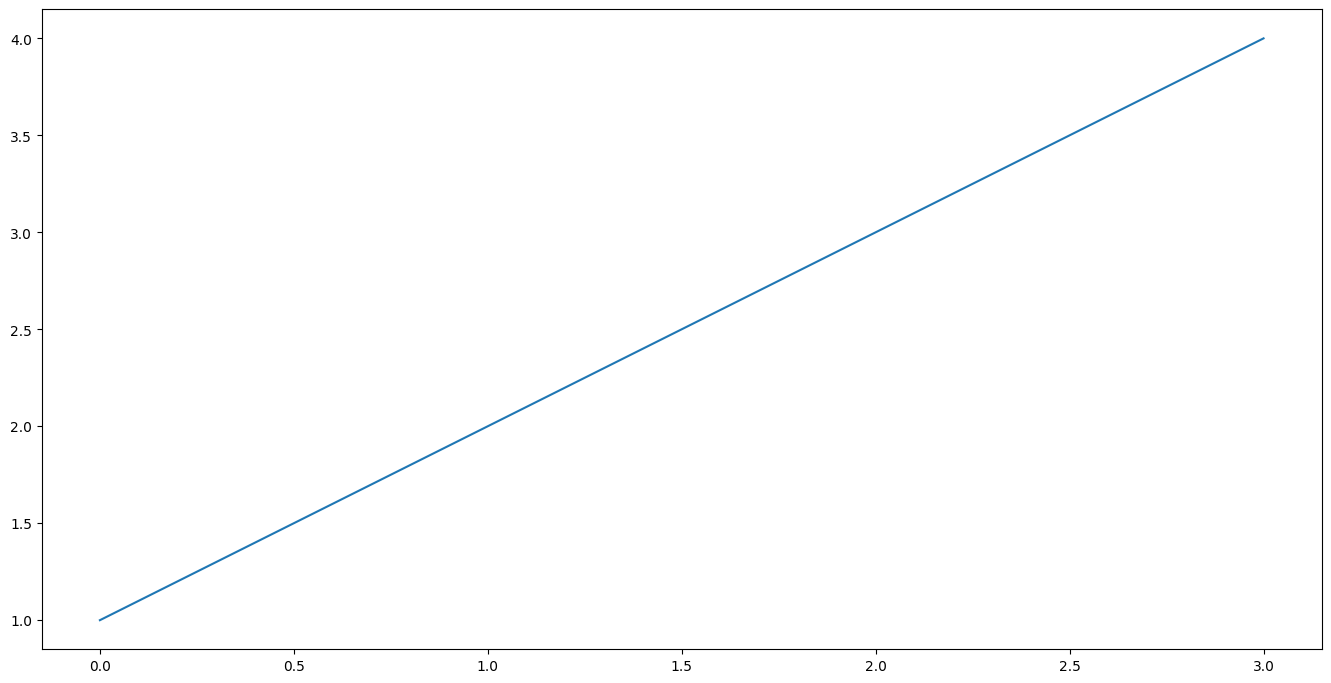

In [3]:
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8 # Quantities are in fractions of figure width and height.
rect = left, bottom, width, height # the dimension of `Axes` object
fig = plt.figure(figsize=(16, 8), dpi=100) # create a `figure` object, `figsize` sets the dimension, `dpi` sets pixel units.
ax = fig.add_axes(rect)
ax.plot([1, 2, 3, 4]) # plot y using x as index array 0..N-1
plt.show()

除了添加坐标系，我们还可以使用 `figure.add_subplot` 方法直接添加子图。子图是 `Axes` 的一个子类，我们可以把子图看作画布矩阵中的一个元素，每个元素有自己的坐标系，我们可以在上面画图。比如，在下面的代码中，我们创建两个子图。

fig.axes:  [<Axes: >, <Axes: >]
ax1.figure: Figure(1600x800)
ax2.figure:  Figure(1600x800)
ax1.xaxis:  XAxis(200.0,424.0)
ax2.xaxis:  XAxis(200.0,87.99999999999999)
ax1.yaxis:  YAxis(200.0,424.0)
ax2.yaxis:  YAxis(200.0,87.99999999999999)


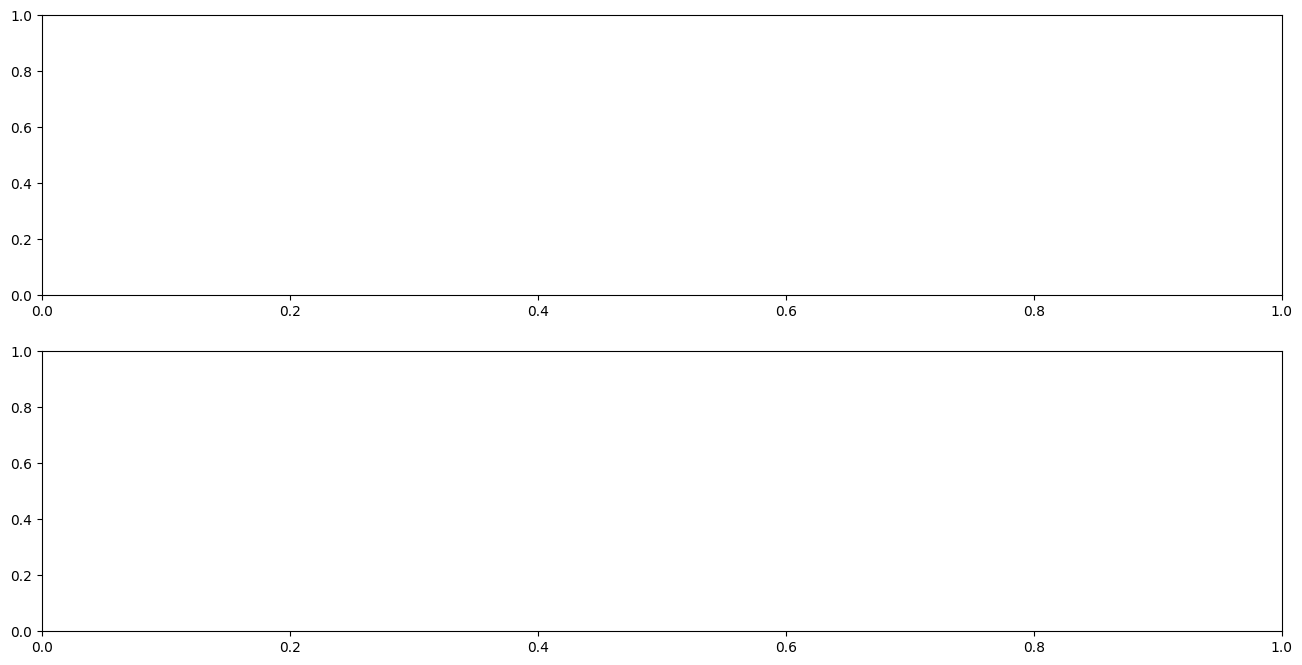

In [4]:
fig = plt.figure(figsize=(16, 8), dpi=100)
ax1 = fig.add_subplot(2, 1, 1) # 2 rows, 1 column, the first subplot
ax2 = fig.add_subplot(2, 1, 2) # 2 rows, 1 column, the second subplot

print('fig.axes: ', fig.axes)
print('ax1.figure:' , ax1.figure)
print('ax2.figure: ', ax2.figure)
print('ax1.xaxis: ', ax1.xaxis)
print('ax2.xaxis: ', ax2.xaxis)
print('ax1.yaxis: ', ax1.yaxis)
print('ax2.yaxis: ', ax2.yaxis)

以上输出可以发现，`figure` 对象包含两个坐标系；ax1 和 ax2 所处的 `figure` 是一样的；ax1 和 ax2 的坐标轴不一样。

除了先生成图，再添加坐标系，我们也可以使用 [`plt.subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) 方法同时生成图和坐标系。比如，下面我们同时生成横向的两个子图，并让它们共享 Y 轴。

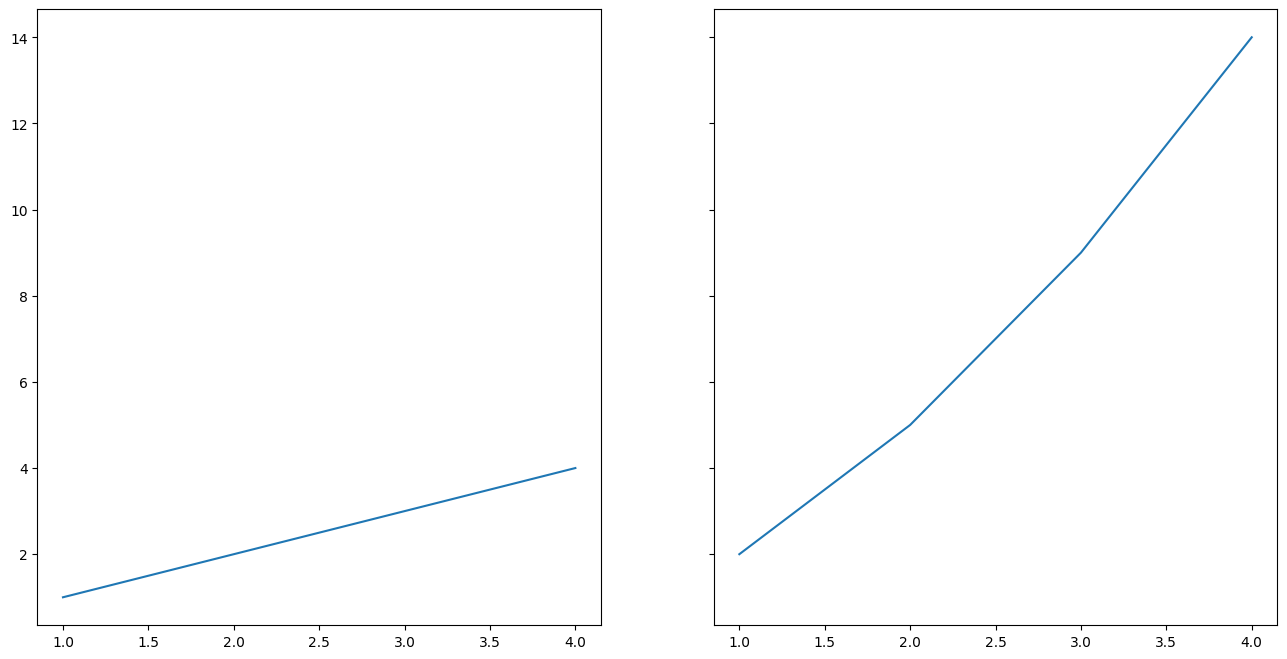

In [5]:
# create some toy data
x = [1, 2, 3, 4]
y1 = [1, 2, 3, 4]
y2 = [2, 5, 9, 14]
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 8), dpi=100)
ax1.plot(x, y1)
ax2.plot(x, y2)

# OO-style vs Pyplot-style

在上面的代码中，我们使用了面向对象的风格来使用 matplotlib，即首先显示地创建了图和坐标系实例，再调用它们的方法实现绘图。除此之外，matplotlib 还提供了另一套模仿 MATLAB 的接口，即 Pyplot-style interface。比如下面的代码：

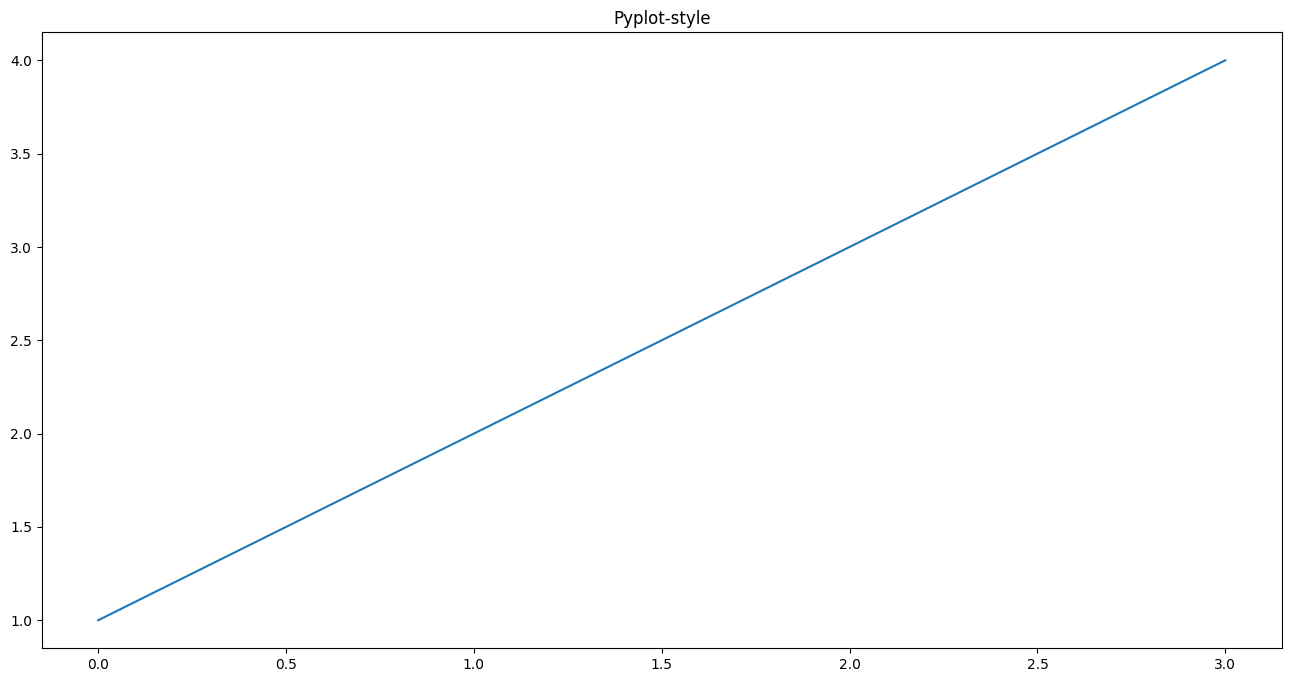

In [6]:
plt.figure(figsize=(16, 8), dpi=100)

plt.plot([1, 2, 3, 4])
plt.title('Pyplot-style')
plt.show()

Pyplot-style 接口是基于状态的接口（state-based interface）。我的理解是每调用一次 `pyplot` 中的命令就会改变一下当前的状态（也就是图像），并将改变之后的状态保存下来，`plt.show()` 展示最终的状态。而 OO-style 是每次新建一个对象，调用该对象的方法从而在画布上创建新的内容。

两者相比，Pyplot-style 接口简洁，方便我们快速的生成各类图像，但是功能不够强大。OO-style 是官方文档推荐我们使用的方式，功能更加强大，我们可以更自由的控制画布中的元素，从而实现图形的定制。因此，在接下来的内容里，我们都使用 OO-style 的方式来绘图。

# 画一张精美的图

要画一张精美的图，就需要对 `Artist` 对象进行定制。首先附上官方文档里的这张图。

![Artist](./parts_of_a_figure.png "Artist")

我们可以对各种 `Aritst` 类型对象进行定制，包括：
- 画布
- 坐标系
- 坐标轴
- 点、线
- 文字
- 图例
- annotation

# 线

matplotlib 中的线是一个 [`line2D`](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) 对象，它有很多属性，我们可以通过对属性进行修改实现对线的美化和定制。这里，列出一些比较常用的属性：

- `color` 或者 `c`：线的颜色；
- `alpha`：透明度；
- `linewidth`：线的宽度；
- `linestyle` 或者 `ls`；
    - `-` 或者 `solid`：实线；
    - `--` 或者 `dashed`：短划线；
    - `-.` 或者 `dashdot`：点划线；
    - `:` 或者 `dotted`：点虚线；
- [`marker`](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers) 或则 `m`：
    - `.`：点
    - `o`：圆圈
    - `^`：上三角形
    - `+`：加号
    - `x`：X
    - `s`：正方形
    - `*`：五角星
    
下面，我们在代码中来看一下各种属性的使用：

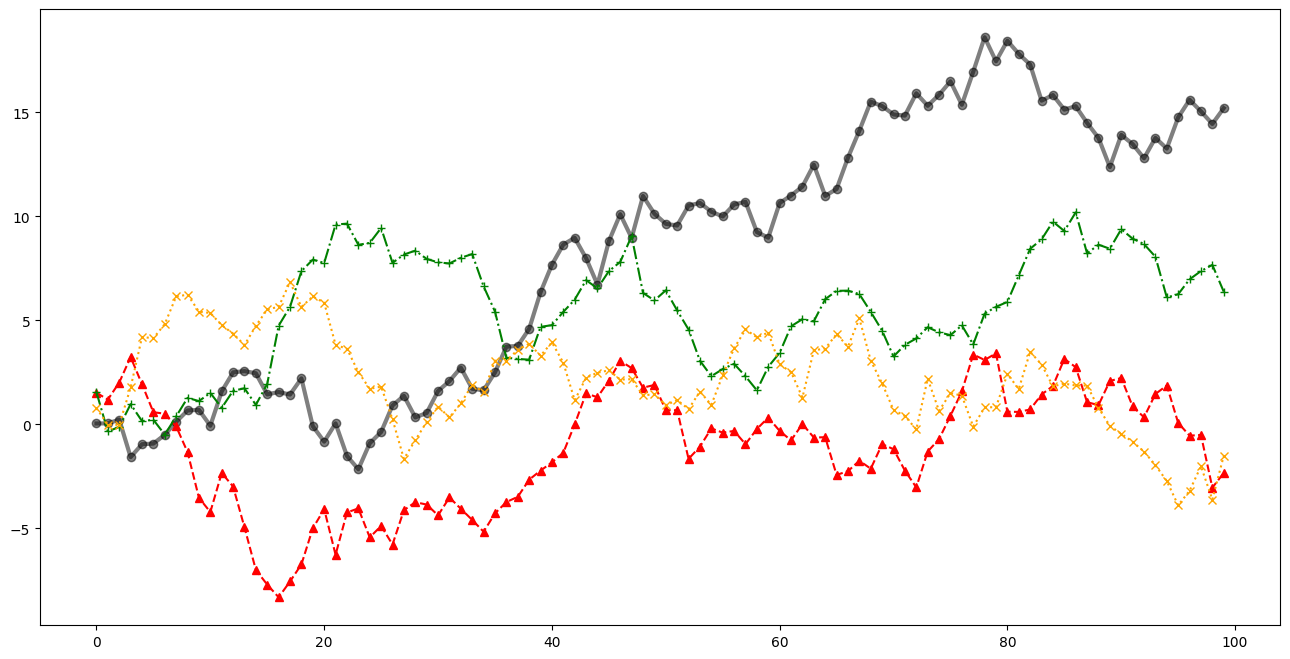

In [7]:
# create some toy data
import numpy as np
data1, data2, data3, data4 = np.random.randn(4, 100)

fig, ax = plt.subplots(figsize=(16,8), dpi=100)

ax.plot(np.cumsum(data1), color='black', linewidth='3', linestyle='-', marker='o', alpha=0.5) 
ax.plot(np.cumsum(data2), color='red', linestyle='--', marker='^')
ax.plot(np.cumsum(data3), color='green', linestyle='-.', marker='+')
ax.plot(np.cumsum(data4), color='orange', linestyle=':', marker='x')

我们也可以使用对应的方法来设置或者修改属性值。`ax.plot()` 方法返回一个 `line2D` 对象列表，我们可以在对应的 `line2D` 对象上调用方法。比如，我们可以使用 `set_linestyle()` 方法修改 `linestyle` 属性，可以使用 `set_marker()` 方法修改 `marker` 属性。

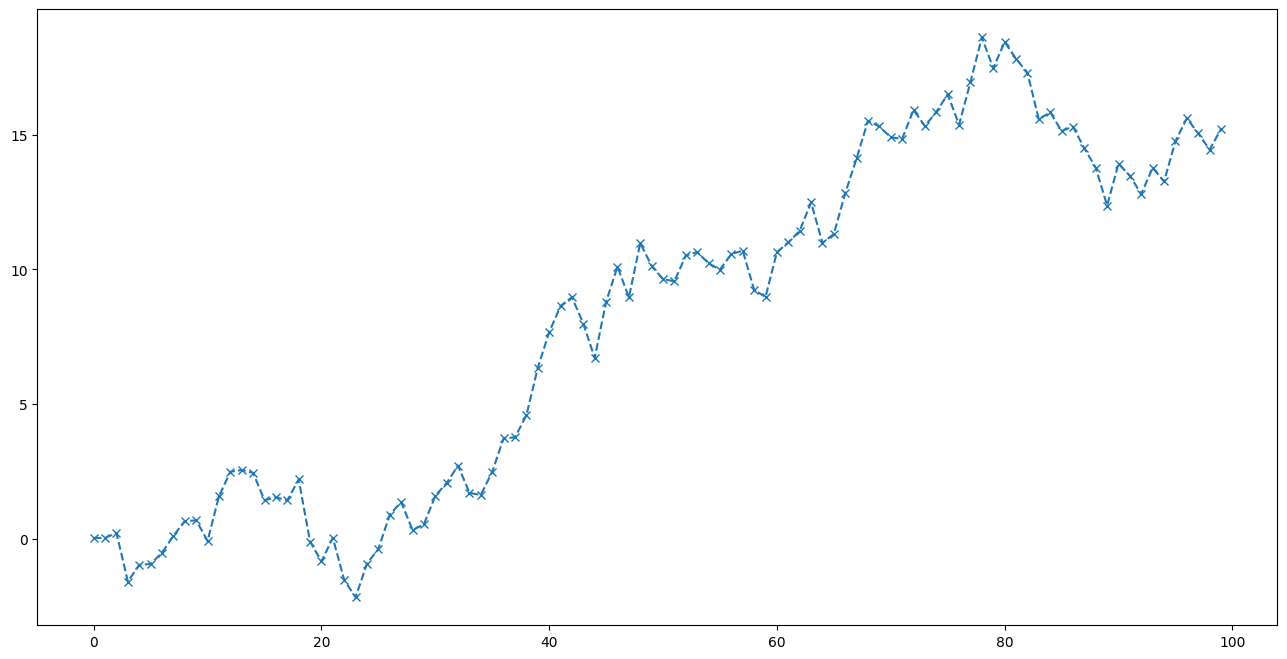

In [8]:
fig, ax = plt.subplots(figsize=(16, 8), dpi=100)

l, = ax.plot(np.cumsum(data1))
l.set_linestyle('--')
l.set_marker('x')

In [9]:
data1, data2, data3, data4 = np.random.randn(4, 100)

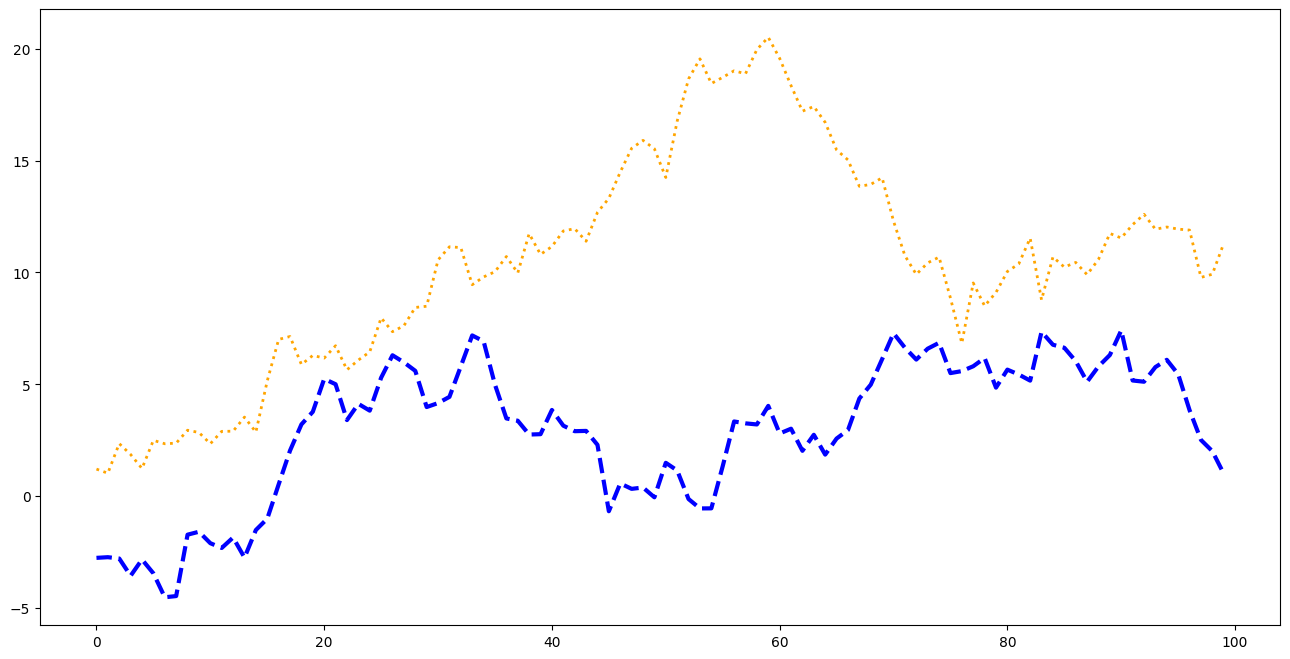

In [10]:
fig, ax = plt.subplots(figsize=(16, 8))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l= ax.plot(x, np.cumsum(data2), color='orange', linewidth=2, linestyle=':')
# l.set_linestyle(':')

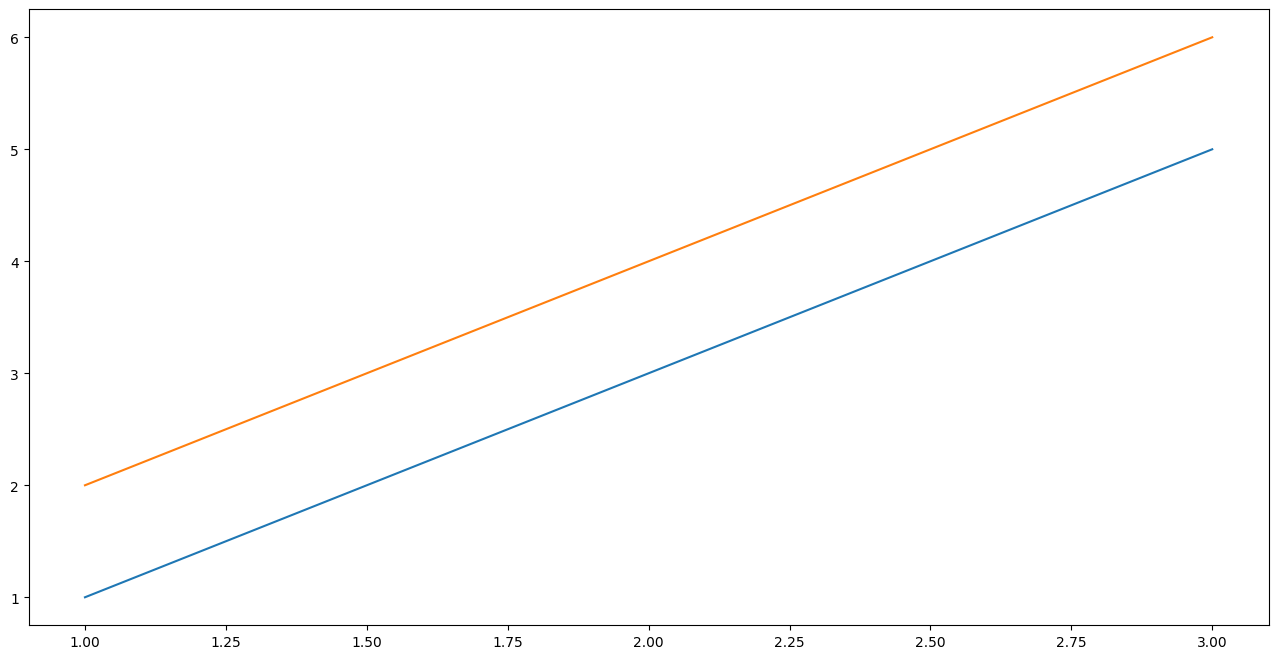

In [11]:
fig, ax = plt.subplots(figsize=(16, 8), dpi=100) 
x = [1, 2, 3]
y = np.array([[1, 2], [3, 4], [5, 6]])
ax.plot(x, y) # ax.plot() return a list of `Line2D` objects

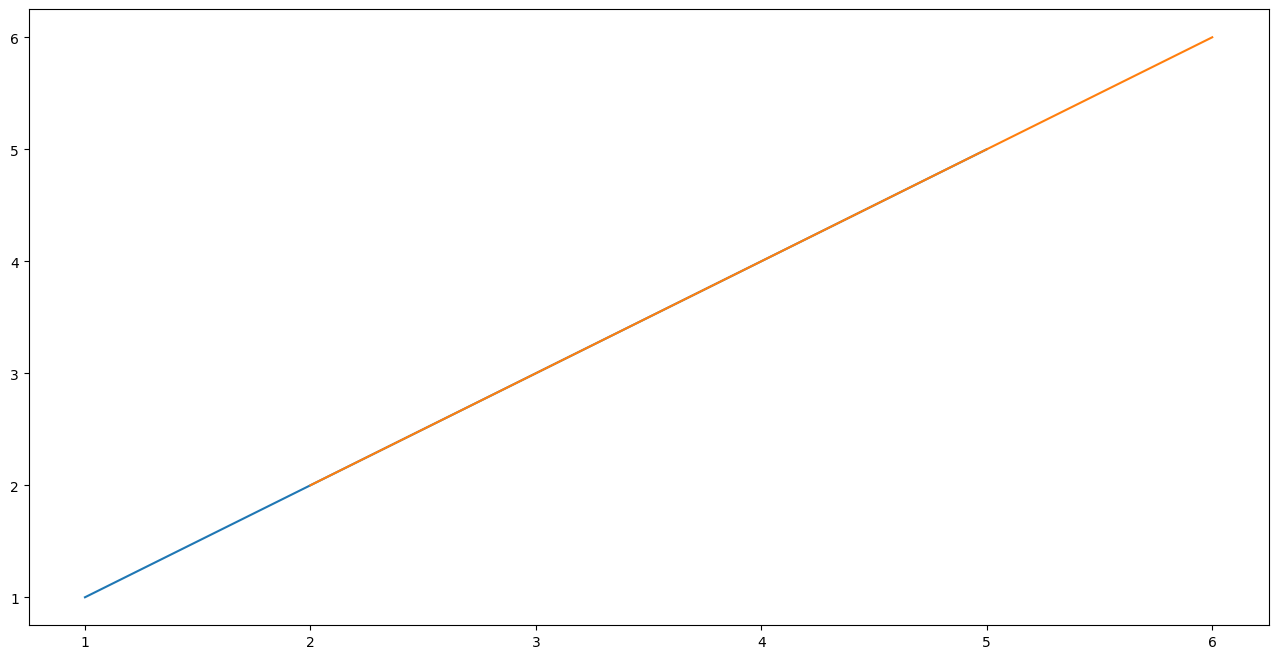

In [12]:
fig, ax = plt.subplots(figsize=(16, 8), dpi=100)
x = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([[1, 2], [3, 4], [5, 6]])
ax.plot(x, y)

# References

- https://matplotlib.org/matplotblog/posts/pyplot-vs-object-oriented-interface/
- https://stackoverflow.com/questions/52816131/matplotlib-pyplot-documentation-says-it-is-state-based-interface-to-matplotlib
- https://matplotlib.org/stable/tutorials/introductory/usage.html#styling-artists